## MODUL VI: EKSTRAKSI FITUR

In [39]:
# Import library yang kalian butuhkan
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
from tqdm import tqdm

Kode di atas menggunakan beberapa pustaka untuk berbagai tugas: cv2 untuk membaca dan memanipulasi gambar, numpy untuk operasi matriks pada gambar, matplotlib.pyplot untuk menampilkan plot dan grafik, os untuk mengelola file, dan pandas untuk memanipulasi data tabular.

Kode di bawah ini menggunakan library Pandas untuk membaca data dari file CSV bernama validation.csv dan menampilkan 10 baris pertama dari data tersebut. 

In [40]:
df = pd.read_csv('validation.csv')
df.head(10)

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,correlation_90,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135
0,1768.320952,1930.804999,1137.489905,1365.584606,23.408952,26.309066,17.052571,19.286253,0.358650,0.291555,...,0.677119,0.604250,0.063717,7.732198,0.050296,8.081334,0.088581,7.687207,0.070051,7.888678
1,1812.106476,962.718707,1484.389905,2024.235469,21.899238,13.042055,17.873333,24.230708,0.553610,0.616566,...,0.535699,0.373513,0.273481,5.519998,0.323768,5.276858,0.315946,5.237368,0.259917,5.575754
2,3105.920381,2531.586193,1792.079048,3266.372942,31.926476,28.332077,21.813905,34.587582,0.291026,0.305981,...,0.725098,0.487873,0.060900,8.801246,0.069178,8.836806,0.099234,8.447755,0.056196,8.908830
3,3368.077524,3385.628050,2257.855238,3732.729022,34.036000,35.312636,25.453714,38.123587,0.383712,0.381870,...,0.644318,0.414587,0.128828,7.933115,0.134717,8.002267,0.177535,7.614807,0.119482,8.071418
4,1494.007619,1901.003769,1564.364952,1991.394366,18.807619,24.932751,20.617524,24.786947,0.459871,0.437812,...,0.746622,0.677922,0.170954,7.475274,0.178092,7.519773,0.222201,7.048745,0.176254,7.528260
5,2016.626476,1729.706804,1722.473905,2630.770680,22.110286,19.118826,18.968000,28.087086,0.604242,0.624846,...,0.579720,0.371472,0.335015,5.179604,0.362947,5.073939,0.379662,4.923397,0.306631,5.342083
6,2228.040190,2282.211466,1582.015810,2216.166832,26.218857,26.439595,19.445143,26.724658,0.517689,0.519978,...,0.660475,0.533467,0.250201,6.199406,0.255429,6.199295,0.316318,5.761488,0.256828,6.172533
7,2015.468571,1725.806784,1201.192762,2105.212458,24.165333,21.046221,15.523429,25.581432,0.460784,0.486638,...,0.675230,0.435318,0.171409,6.433991,0.183567,6.392083,0.218355,6.134889,0.158591,6.524993
8,2690.196190,2508.653839,1766.338476,2842.565761,32.264000,31.370760,24.743429,35.559611,0.313187,0.321392,...,0.651248,0.436393,0.082221,8.736676,0.086328,8.830223,0.116122,8.448170,0.070052,8.957134
9,1959.567619,1520.499901,1142.292000,2082.602658,24.788571,21.000992,16.774286,26.968459,0.304822,0.312772,...,0.695393,0.427623,0.058565,8.795501,0.068051,8.789615,0.093480,8.451294,0.052194,8.980675


In [77]:
def tampil_gambar(gambar, titel, baris, kolom):
    fig = plt.figure(figsize=(3*kolom, baris*2)) 
    for i in range(baris*kolom):
        fig.add_subplot(baris,kolom, i+1) 
        plt.title(titel[i])
        plt.imshow(gambar[i], cmap='gray')
        plt.axis('off') 

Fungsi di atas menampilkan gambar-gambar dalam bentuk grid dengan judul yang sesuai menggunakan matplotlib untuk plotting.

## Data Loading

Fungsi di bawah ini digunakan untuk membaca dan mengumpulkan data gambar dari folder yang terstruktur berdasarkan label.

Finger 1


100%|██████████| 50/50 [00:00<00:00, 534.46it/s]


Finger 2


100%|██████████| 50/50 [00:00<00:00, 612.12it/s]


Finger 3


100%|██████████| 50/50 [00:00<00:00, 367.05it/s]


Finger 4


100%|██████████| 50/50 [00:00<00:00, 592.67it/s]


Finger 5


100%|██████████| 50/50 [00:00<00:00, 563.11it/s]


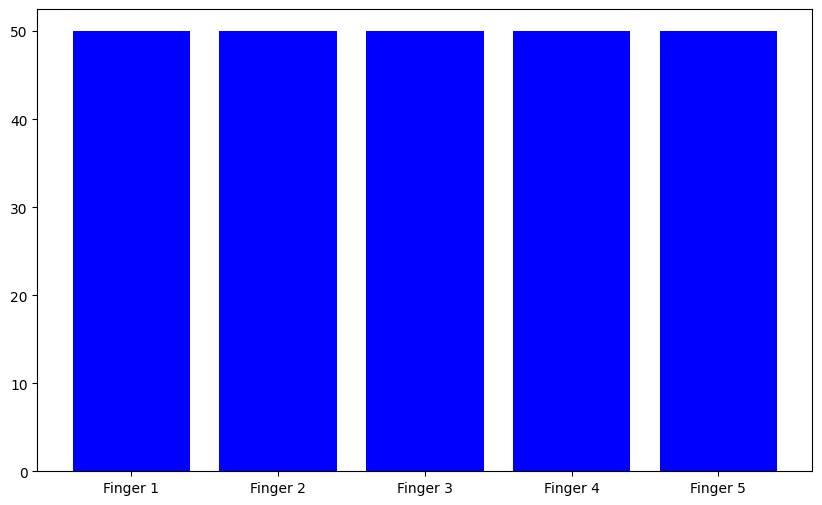

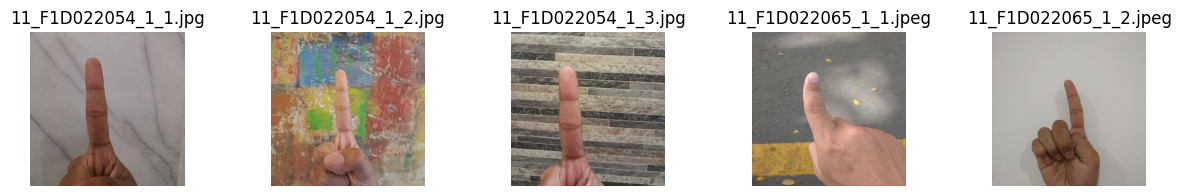

In [78]:
def insertGambar(folder):
    data = []
    filenames = []
    datalabel = []
    image_counts = {}
    for label in os.listdir(folder):
        datalabel.append(label)
        print(label)
        image_counts[label] = 0
        for filename in tqdm(os.listdir(folder+label)):
            img = plt.imread(os.path.join(folder+label,filename))
            if img is not None:
                filenames.append(filename) 
                data.append(img)
                image_counts[label] += 1
    plt.figure(figsize=(10, 6))
    plt.bar(image_counts.keys(), image_counts.values(), color='blue')
    plt.show()
    
    return data, filenames, datalabel
data, filenames, label = insertGambar("Finger Simulation Dataset 2024/")
tampil_gambar(data, filenames, 1, 5)



In [43]:
def resizeImage(data, ukuran):
    resizeData = []
    for img in data:
        resized_img = cv.resize(img, (ukuran, ukuran))
        resizeData.append(resized_img)    
    return resizeData

Fungsi di atas bertujuan untuk mengubah ukuran gambar-gambar dalam sebuah daftar. Ini dilakukan dengan iterasi melalui setiap gambar dalam daftar, lalu menerapkan operasi pengubahan ukuran ke dimensi yang diinginkan.

In [44]:
dataResize = resizeImage(data, 300)

Kode di atas mengubah ukuran semua gambar dalam daftar menjadi 300x300 piksel dengan memggunakan fungsi resizeImage dan hasilnya akan disimpan dalam variabel dataResize.

## Data Preparation

### Data Augmentation

In [45]:
def rotate_image(img, angle):
    rotasi = img.copy()
    height, width = img.shape[:2]
    sudut = np.deg2rad(angle)
    cos = np.cos(sudut)
    sin = np.sin(sudut)
    tinggi_tengah = int((height-1)/2)
    lebar_tengah = int((width-1)/2)
    for i in range(rotasi.shape[0]):
        for j in range(rotasi.shape[1]):
            X = (i - tinggi_tengah) * cos + (j - lebar_tengah) * sin
            Y = -(i - tinggi_tengah) * sin + (j - lebar_tengah) * cos
            X = int(X + tinggi_tengah)
            Y = int(Y + lebar_tengah)
            if X >= 0 and Y >= 0 and X < rotasi.shape[0] and Y < rotasi.shape[1]:
                rotasi[i][j] = img[X][Y]
    return rotasi

Fungsi di atas bertujuan untuk memutar sebuah gambar dengan sudut tertentu. Fungsi ini menerima dua parameter: image, yang merupakan gambar yang akan diputar, dan derajat, yang menunjukkan besar sudut rotasi dalam derajat.

In [46]:
def pencerminan(image, axis):
    if axis == 'horizontal':
        return image[::-1, :]
    elif axis == 'vertikal':
        return image[:, ::-1]
    else:
        return image

Fungsi di atas digunakan untuk mencerminkan sebuah gambar baik secara vertikal maupun horizontal, tergantung pada nilai parameter axis. Fungsi ini menerima dua parameter: image, yang merupakan gambar yang akan dicerminkan, dan axis, yang menentukan arah pencerminan (vertikal dan horizontal).

In [47]:
def augmentasi(data, filenames, banyakData):
    augmented_data = []
    augmented_filenames = []
    for i in tqdm(range(len(data))):
        augmented_data.append(data[i])
        augmented_filenames.append(filenames[i])
        for j in range(banyakData):
            if j % 4 == 0:
                augmented_data.append(rotate_image(data[i], 90))
                augmented_filenames.append(filenames[i])
            elif j % 4 == 1:
                augmented_data.append(rotate_image(data[i], -90))
                augmented_filenames.append(filenames[i])
            elif j % 4 == 2:
                augmented_data.append(pencerminan(data[i], 'horizontal'))
                augmented_filenames.append(filenames[i])
            elif j % 4 == 3:
                augmented_data.append(pencerminan(data[i], 'vertikal'))
                augmented_filenames.append(filenames[i])
    return augmented_data, augmented_filenames

Fungsi di atas digunakan untuk memperbesar dataset gambar dengan menerapkan transformasi rotasi dan pencerminan. Fungsi ini menerima tiga parameter: data (daftar gambar), filenames (daftar nama file), dan banyakData (jumlah augmentasi yang akan diterapkan pada setiap gambar).

Kode di bawah digunakan untuk memperbesar dataset gambar yang telah diubah ukurannya (dataResize) dengan menerapkan berbagai transformasi dengan menggunakan fungsi augmentasi dan menyimpan hasilnya dalam variabel augmented_data dan augmented_filenames.

In [48]:
augmented_data, augmented_filenames = augmentasi(dataResize, filenames, 4)

100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


### Preprocessing

#### Preprocessing 1

In [49]:
def grayscale(data):
    grayData = []
    for img in data:
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        grayData.append(gray)
    return grayData
grayData = grayscale(augmented_data)

fungsi di atas diguankan untuk mengubah daftar gambar berwarna menjadi gambar skala abu-abu dan menggunakan fungsi tersebut untuk mengonversi daftar gambar yang telah di-augmentasi (augmented_data) menjadi gambar-gambar skala abu-abu, dan menyimpan hasilnya dalam variabel grayData.

#### Preprocessing 2

In [50]:
def konvolusi_gradient(img, kernel):
    img = np.array(img)  # Pastikan img adalah array NumPy
    hImg, wImg = img.shape[:2]
    hKernel, wKernel = kernel.shape[:2]

    pad_height = hKernel // 2
    pad_width = wKernel // 2

    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    result = np.zeros((hImg, wImg))

    for i in range(hImg):
        for j in range(wImg):
            result[i, j] = np.sum(padded_img[i:i + hKernel, j:j + wKernel] * kernel)
    
    return result

Fungsi konvolusi_gradient menerapkan operasi konvolusi pada gambar dengan kernel yang diberikan. Gambar diubah menjadi array NumPy dan dimensinya dihitung, bersama dengan dimensi kernel. Gambar kemudian dipadatkan (padding) dengan nol di tepinya untuk memungkinkan konvolusi penuh. Array kosong disiapkan untuk menyimpan hasil konvolusi. Fungsi menggunakan loop bersarang untuk menerapkan kernel ke setiap posisi piksel gambar, mengalikan elemen-elemen kernel dengan elemen gambar yang sesuai, dan menjumlahkan hasilnya. Hasil konvolusi disimpan dalam array hasil dan dikembalikan oleh fungsi ini.

In [51]:
def prewitt(img):
    gx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    gy = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

    x = konvolusi_gradient(img, gx)
    y = konvolusi_gradient(img, gy)

    magnitude = np.abs(x) + np.abs(y)
    return magnitude

Fungsi prewitt mendeteksi tepi gambar menggunakan operator Prewitt. Pertama, dua kernel (gx dan gy) didefinisikan untuk mendeteksi perubahan horizontal dan vertikal. Fungsi konvolusi_gradient diterapkan pada gambar dengan kedua kernel tersebut untuk menghasilkan gradien x dan y. Magnitudo gradien dihitung dengan menjumlahkan nilai absolut x dan y, yang menyoroti tepi dalam gambar. Fungsi mengembalikan hasil ini sebagai gambar tepi.

Baris kode prewittData = [prewitt(img) for img in tqdm(grayData)] digunakan untuk menerapkan fungsi prewitt pada setiap gambar dalam daftar grayData, dan menyimpan hasilnya dalam daftar prewittData.

In [52]:
prewittData = [prewitt(img) for img in tqdm(grayData)]

100%|██████████| 1250/1250 [46:43<00:00,  2.24s/it]


In [53]:
path = np.zeros(len(augmented_filenames), dtype = object)
for i in range(len(augmented_filenames)):
    for j in range(len(augmented_filenames[i])):
        if augmented_filenames[i][j] == '.':
            break
        if augmented_filenames[i][j+1] == '_' and augmented_filenames[i][j-1] == '_':
            label = "Finger_"+augmented_filenames[i][j]
    path[i] = label

Kode di atas membuat array path yang berisi label-label yang diekstraksi dari nama file pada augmented_filenames.

Kode di bawah ini memanggil fungsi display untuk menampilkan sejumlah gambar dalam format 1x5

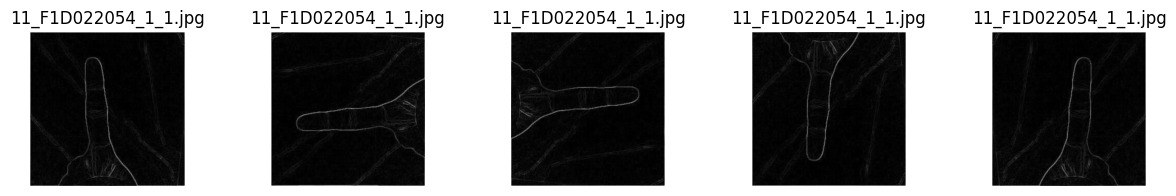

In [79]:
tampil_gambar(prewittData, augmented_filenames, 1, 5)

#### Preprocessing n

### Feature Extraction

In [55]:
def derajat0(img): 
    max_val = int(np.max(img)) + 1
    imgTmp = np.zeros((max_val, max_val))
    for i in range(len(img)):
        for j in range(len(img[i])-1):
            index_i = int(img[i, j])
            index_j = int(img[i, j+1])
            if index_i < max_val and index_j < max_val:
                imgTmp[index_i, index_j] += 1
    data = imgTmp + np.transpose(imgTmp)
    tmp = np.sum(data)
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= tmp
    return data

def derajat45(img):
    max_val = int(np.max(img)) + 1
    imgTmp = np.zeros((max_val, max_val))
    for i in range(len(img)-1):
        for j in range(len(img[i])-1):
            index_i = int(img[i+1, j])
            index_j = int(img[i, j+1])
            if index_i < max_val and index_j < max_val:
                imgTmp[index_i, index_j] += 1
    data = imgTmp + np.transpose(imgTmp)
    tmp = np.sum(data)
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= tmp
    return data

def derajat90(img):
    max_val = int(np.max(img)) + 1
    imgTmp = np.zeros((max_val, max_val))
    for i in range(len(img)-1):
        for j in range(len(img[i])):
            index_i = int(img[i+1, j])
            index_j = int(img[i, j])
            if index_i < max_val and index_j < max_val:
                imgTmp[index_i, index_j] += 1
    data = imgTmp + np.transpose(imgTmp)
    tmp = np.sum(data)
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= tmp
    return data

def derajat135(img):
    max_val = int(np.max(img)) + 1
    imgTmp = np.zeros((max_val, max_val))
    for i in range(len(img)-1):
        for j in range(len(img[i])-1):
            index_i = int(img[i+1, j])
            index_j = int(img[i, j+1])
            if index_i < max_val and index_j < max_val:
                imgTmp[index_i, index_j] += 1
    data = imgTmp + np.transpose(imgTmp)
    tmp = np.sum(data)
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= tmp
    return data


Fungsi-fungsi di atas, yaitu derajat0, derajat45, derajat90, dan derajat135, bertujuan untuk menghasilkan matriks distribusi kejadian kejadian perpindahan piksel antar tetangga dalam sebuah gambar. Setiap fungsi ini menerima sebuah gambar dalam bentuk matriks piksel dan mengembalikan matriks yang merepresentasikan distribusi kejadian perpindahan piksel dalam empat arah yang berbeda: horizontal, diagonal 45 derajat, vertikal, dan diagonal 135 derajat.

Kode di bawah melakukan iterasi melalui setiap gambar dalam grayData, sebuah daftar yang berisi gambar-gambar dalam bentuk skala abu-abu. Selama iterasi, untuk setiap gambar, empat arah distribusi kejadian perpindahan piksel dihitung menggunakan fungsi derajat0, derajat45, derajat90, dan derajat135. Setiap hasil perhitungan ini disimpan dalam sebuah daftar yang merupakan bagian dari sebuah daftar yang lebih besar yang disebut hasil.

In [56]:
hasil = []
for dat in tqdm(grayData):
    feature_set = []
    feature_set.append(derajat0(dat))
    feature_set.append(derajat45(dat))
    feature_set.append(derajat90(dat))
    feature_set.append(derajat135(dat))
    hasil.append(feature_set)

100%|██████████| 1250/1250 [13:25<00:00,  1.55it/s]


In [57]:
def contrast(data):
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            simpan += data[i, j] + pow(i - j, 2)
    return simpan

def dissimilarity(data): 
    simpan = 0
    for i in range(len(data)): 
        for j in range(len(data)):
            simpan += data[i, j] + abs(i - j)
    return simpan

def homogenitas(data): 
    simpan = 0 
    for i in range(len(data)):
        for j in range(len(data)):
            simpan += data[i, j] / (1 + abs(i - j))
    return simpan

def entropi(data): 
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i, j] > 0:
                simpan += -(data[i, j] * math.log(data[i, j]))
    return simpan

def ASM(data): 
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            simpan += pow(data[i, j], 2)
    return simpan 

def energy(data): 
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            simpan += pow(data[i, j], 2)
    return simpan

def correlation(data): 
    mI = np.sum(np.arange(data.shape[0])[:, None] * np.sum(data, axis=1)) / np.sum(data)
    mJ = np.sum(np.arange(data.shape[1])[None, :] * np.sum(data, axis=0)) / np.sum(data)
    
    tI = np.sqrt(np.sum(((np.arange(data.shape[0])[:, None] - mI) ** 2) * np.sum(data, axis=1)) / np.sum(data))
    tJ = np.sqrt(np.sum(((np.arange(data.shape[1])[None, :] - mJ) ** 2) * np.sum(data, axis=0)) / np.sum(data))
    
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if tI != 0 and tJ != 0:
                simpan += ((i - mI) * (j - mJ) * data[i, j]) / (tI * tJ)
            else:
                continue
    
    return simpan


Fungsi-fungsi di atas adalah metrik statistik yang digunakan untuk menganalisis distribusi kejadian perpindahan piksel dalam sebuah matriks. Ini adalah bagian dari proses ekstraksi fitur dalam pengolahan citra.

Kode di bawah bertujuan untuk mengekstraksi fitur-fitur statistik dari distribusi kejadian perpindahan piksel dalam matriks gambar untuk setiap sudut rotasi. Proses ini dilakukan menggunakan fungsi-fungsi statistik seperti kontras, disimilaritas, homogenitas, energi, dan korelasi. Setiap fitur dihitung untuk setiap sudut rotasi (0, 45, 90, dan 135 derajat) dan hasilnya disimpan dalam bentuk daftar result.

In [58]:
angles = ['0', '45', '90', '135']
fiturs = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
result = []

for i in tqdm(range(len(hasil))):
    extracted_data = []
    extracted_data.append(path[i])
    for j in range(len(hasil[i])):
        contrast_val = contrast(hasil[i][j])
        extracted_data.append(contrast_val)
    for j in range(len(hasil[i])):
        dissimilarity_val = dissimilarity(hasil[i][j])
        extracted_data.append(dissimilarity_val)
    for j in range(len(hasil[i])):
        homogeneity_val = homogenitas(hasil[i][j])
        extracted_data.append(homogeneity_val)
    for j in range(len(hasil[i])):
        energy_val = energy(hasil[i][j])
        extracted_data.append(energy_val)
    for j in range(len(hasil[i])):
        correlation_val = correlation(hasil[i][j])
        extracted_data.append(correlation_val)
    for j in range(len(hasil[i])):
            asm_val = ASM(hasil[i][j])
            extracted_data.append(asm_val)
            entropy_val = entropi(hasil[i][j])
            extracted_data.append(entropy_val)
    result.append(extracted_data)

100%|██████████| 1250/1250 [21:48<00:00,  1.05s/it]


In [59]:
headers = ['Path']
for fitur in fiturs:
    headers.extend([f'{fitur}_0', f'{fitur}_45', f'{fitur}_90', f'{fitur}_135'])
for angle in angles:
    headers.extend([f'asm_{angle}', f'entropy_{angle}'])
df = pd.DataFrame(result, columns=headers)
df.to_csv('dataset1.csv', index=False)

Kode di atas bertujuan untuk membuat sebuah DataFrame pandas yang akan digunakan untuk menyimpan data fitur-fitur yang diekstraksi dari distribusi perpindahan piksel dalam matriks gambar. 

Perintah df.head(10) digunakan untuk menampilkan 10 baris pertama dari DataFrame df. DataFrame ini berisi data fitur-fitur yang diekstraksi dari distribusi perpindahan piksel dalam matriks gambar untuk setiap sudut rotasi, serta fitur tambahan seperti ASM (Angular Second Moment) dan entropi.

In [60]:
df.head(10)

,Path,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,...,correlation_90,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135
0,Finger_1,1.635792e+08,1.635792e+08,1.635792e+08,1.635792e+08,1848353.0,1848353.0,1848353.0,1848353.0,0.540889,...,0.000148,0.000146,0.002846,6.727468,0.001990,7.020592,0.002901,6.654147,0.001990,7.020592
1,Finger_1,1.635792e+08,1.635792e+08,1.635792e+08,1.635792e+08,1848353.0,1848353.0,1848353.0,1848353.0,0.546358,...,0.000146,0.000146,0.002888,6.659297,0.002113,6.951803,0.002828,6.745441,0.002113,6.951803
2,Finger_1,1.635792e+08,1.635792e+08,1.635792e+08,1.635792e+08,1848353.0,1848353.0,1848353.0,1848353.0,0.545073,...,0.000146,0.000146,0.002900,6.667768,0.002124,6.946575,0.002854,6.723061,0.002124,6.946575
3,Finger_1,1.635792e+08,1.635792e+08,1.635792e+08,1.635792e+08,1848353.0,1848353.0,1848353.0,1848353.0,0.540889,...,0.000148,0.000147,0.002846,6.727468,0.002126,6.935428,0.002901,6.654147,0.002126,6.935428
4,Finger_1,1.635792e+08,1.635792e+08,1.635792e+08,1.635792e+08,1848353.0,1848353.0,1848353.0,1848353.0,0.540889,...,0.000148,0.000147,0.002846,6.727468,0.002126,6.935428,0.002901,6.654147,0.002126,6.935428
5,Finger_1,3.495380e+08,3.495380e+08,3.495380e+08,3.495380e+08,3266711.0,3266711.0,3266711.0,3266711.0,0.289774,...,0.000068,0.000064,0.000562,7.964786,0.000421,8.230491,0.000598,7.895554,0.000421,8.230491
6,Finger_1,3.495380e+08,3.495380e+08,3.495380e+08,3.495380e+08,3266711.0,3266711.0,3266711.0,3266711.0,0.302019,...,0.000068,0.000066,0.000599,7.895193,0.000447,8.159829,0.000560,7.974343,0.000447,8.159829
7,Finger_1,3.495380e+08,3.495380e+08,3.495380e+08,3.495380e+08,3266711.0,3266711.0,3266711.0,3266711.0,0.300557,...,0.000068,0.000066,0.000594,7.904796,0.000447,8.158159,0.000562,7.965110,0.000447,8.158159
8,Finger_1,3.495380e+08,3.495380e+08,3.495380e+08,3.495380e+08,3266711.0,3266711.0,3266711.0,3266711.0,0.289774,...,0.000068,0.000066,0.000562,7.964786,0.000449,8.151951,0.000598,7.895554,0.000449,8.151951
9,Finger_1,3.495380e+08,3.495380e+08,3.495380e+08,3.495380e+08,3266711.0,3266711.0,3266711.0,3266711.0,0.289774,...,0.000068,0.000066,0.000562,7.964786,0.000449,8.151951,0.000598,7.895554,0.000449,8.151951


### Features Selection

In [61]:
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv('dataset1.csv')
x = df.drop('Path', axis=1)
y = df['Path']
selector = VarianceThreshold(threshold=0.06)
x = selector.fit_transform(x)

Kode di atas membaca data dari file CSV 'dataset1.csv' ke dalam DataFrame df dan kemudian menggunakan metode threshold varians dengan nilai threshold sebesar 0.06 untuk melakukan seleksi fitur. Fitur-fitur dengan varians di bawah threshold ini dihapus, dan hasilnya disimpan kembali dalam variabel x.

### Splitting Data

In [62]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

Kode tersebut menggunakan scikit-learn untuk membagi dataset menjadi data pelatihan dan pengujian. Data dipisahkan menjadi xTrain, xTest, yTrain, dan yTest, dengan 80% data untuk pelatihan dan 20% untuk pengujian. Parameter random_state=42 memastikan pembagian data konsisten.

### Normalization

In [63]:
def min_max_normalization(data):
    minValue = data.min(axis=0)
    maxValue = data.max(axis=0)
    normalized_data = (data - minValue) / (maxValue - minValue)
    return normalized_data

Fungsi min_max_normalization di atas adalah untuk melakukan normalisasi min-max pada data yang diberikan. Normalisasi min-max adalah salah satu teknik normalisasi yang umum digunakan dalam pengolahan data, di mana nilai-nilai dalam dataset diubah sedemikian rupa sehingga rentang nilainya berada di antara 0 dan 1.

In [64]:
xTrain = min_max_normalization(xTrain)
xTest = min_max_normalization(xTest)

Kode di atas bertujuan untuk menerapkan normalisasi min-max pada data latih (xTrain) dan data uji (xTest) yang telah dipisahkan sebelumnya.

## Modeling

Kode di bawah bertujuan untuk melatih beberapa model klasifikasi yang berbeda menggunakan data latih yang telah dinormalisasi (xTrain) dan labelnya (yTrain), dan kemudian menguji performa model menggunakan data uji yang dinormalisasi (xTest) dan labelnya (yTest) dan  mencetak akurasi dari masing-masing model klasifikasi yang telah dilatih dan dievaluasi sebelumnya.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)
yPredKnn = knn.predict(xTest)
acc_knn = accuracy_score(yTest, yPredKnn)

svm = SVC()
svm.fit(xTrain, yTrain)
yPredKnn = svm.predict(xTest)
acc_svm = accuracy_score(yTest, yPredKnn)

rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)
yPredRf = rf.predict(xTest)
acc_rf = accuracy_score(yTest, yPredRf)

print(f"Accuracy (KNN): {acc_knn}")
print(f"Accuracy (SVM): {acc_svm}")
print(f"Accuracy (Random Forest): {acc_rf}")


Accuracy (KNN): 0.44
Accuracy (SVM): 0.292
Accuracy (Random Forest): 0.576


## Evaluation

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

knn_report = classification_report(yTest, yPredKnn, zero_division=0)
knn_confusion = confusion_matrix(yTest, yPredKnn)

svm_report = classification_report(yTest, yPredKnn, zero_division=0)
svm_confusion = confusion_matrix(yTest, yPredKnn)

rf_report = classification_report(yTest, yPredRf, zero_division=0)
rf_confusion = confusion_matrix(yTest, yPredRf)



Kode di atas bertujuan untuk menghasilkan laporan klasifikasi dan confusion matrix untuk setiap model klasifikasi yang telah dilatih dan dievaluasi sebelumnya.

Kode di bawah bertujuan untuk mencetak laporan evaluasi dan confusion matrix untuk setiap model klasifikasi yang telah dilatih dan dievaluasi sebelumnya. 

In [67]:
print("Evaluasi K-Nearest Neighbors (KNN):")
print(knn_report)
print("Confusion Matrix KNN:")
print(knn_confusion)

print("\nEvaluasi Support Vector Machine (SVM):")
print(svm_report)
print("Confusion Matrix SVM:")
print(svm_confusion)

print("\nEvaluasi Random Forest:")
print(rf_report)
print("Confusion Matrix Random Forest:")
print(rf_confusion)

Evaluasi K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

    Finger_1       0.50      0.08      0.14        51
    Finger_2       0.36      0.33      0.34        61
    Finger_3       0.26      0.55      0.35        49
    Finger_4       0.28      0.15      0.19        47
    Finger_5       0.26      0.36      0.30        42

    accuracy                           0.29       250
   macro avg       0.33      0.29      0.27       250
weighted avg       0.34      0.29      0.27       250

Confusion Matrix KNN:
[[ 4 15 18  4 10]
 [ 0 20 27  5  9]
 [ 2 11 27  4  5]
 [ 2  3 17  7 18]
 [ 0  6 16  5 15]]

Evaluasi Support Vector Machine (SVM):
              precision    recall  f1-score   support

    Finger_1       0.50      0.08      0.14        51
    Finger_2       0.36      0.33      0.34        61
    Finger_3       0.26      0.55      0.35        49
    Finger_4       0.28      0.15      0.19        47
    Finger_5       0.26      0.36      0.30        